# Baby Names Data from SSA

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The data is split by year so we need to assemble it into one csv
# Create an empty list to store the individual file names: pieces
pieces = []

# Create a list of column names: columns
columns = ['name', 'sex', 'births']

# Variable to iterate over each year's text file: years
years = np.arange(1880, 2016)

# Loop over the text files and create the dataframe
for year in years:
    # create the path to the csvs: path
    path = 'C:/Users/taben/Downloads/data sets/baby_names/yob%d.txt' % year
    
    # Create the initial dataframe: names
    names = pd.read_csv(path, names=columns)
    
    # Create a year column
    names['year'] = year
    
    # Append all of the names dataframes together
    pieces.append(names)
    
    # Create the final dataframe: bnames
    bnames = pd.concat(pieces, ignore_index=True)

# Save the complete dataframe
bnames.to_csv('bnames.csv')
bnames.head()

# Exploring Trends in Names
One of the first things we want to do is to understand naming trends. Let us start by figuring out the top five most popular male and female names for this decade (born 2011 and later).

In [5]:
bnames_2010 = bnames.loc[bnames['year'] > 2010]
bnames_2010_agg = bnames_2010.groupby(['sex', 'name'], as_index=False)['births'].sum()
bnames_top5 = bnames_2010_agg.\
    sort_values(['sex', 'births'],ascending=[True, False]).\
    groupby('sex').head(5).reset_index(drop=True)
print(bnames_2010_agg.head())
bnames_top5

  sex       name  births
0   F      Aabha      28
1   F  Aabriella      10
2   F       Aada       5
3   F    Aadhira      37
4   F     Aadhya     848


,sex,name,births
0,F,Emma,101961
1,F,Sophia,101282
2,F,Olivia,92445
3,F,Isabella,89225
4,F,Ava,78270
5,M,Noah,91265
6,M,Jacob,90306
7,M,Mason,89912
8,M,Liam,85112
9,M,William,83476


# Proportion of Births
In order to make comparisons across years, we need to control for population effects. This is done by normalizing the number of births by the total number of births in that year.

In [7]:
bnames2 = bnames.copy()

# Compute the proportion of births by year and add it as a new column: prop_births
total_births_by_year = bnames.groupby('year')['births'].transform(np.sum)
bnames2['prop_births'] = (bnames2['births'] / total_births_by_year)

print(bnames2.head())

        name sex  births  year  prop_births
0       Mary   F    7065  1880     0.035065
1       Anna   F    2604  1880     0.012924
2       Emma   F    2003  1880     0.009941
3  Elizabeth   F    1939  1880     0.009624
4     Minnie   F    1746  1880     0.008666


# Popularity of Names
plotting the popularity of two random names and inspecting the underlying trends for any interesting patterns

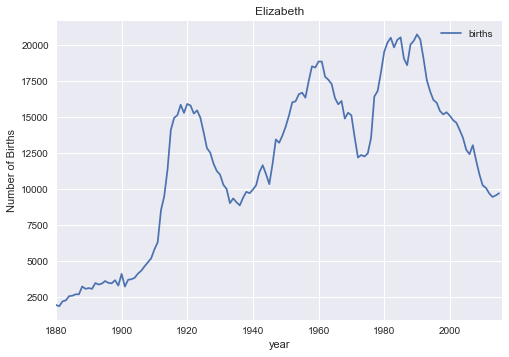

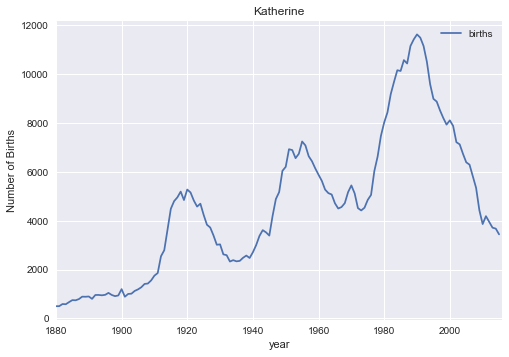

In [41]:
% matplotlib inline
plt.style.use('seaborn')
plt.figure(figsize=(70, 70), dpi=1600)

def plot_trends(name, sex):
    """Create a df based on name and sex and plot the trend in the number of births"""
    data = bnames[(bnames.name==name) & (bnames.sex==sex)]
    ax = data.plot(x='year', y='births', title=name)
    plt.ylabel('Number of Births')
    
    ax.set_xlim(1880, 2016)
    return ax


#for name in bnames:
plot_trends('Elizabeth','F')
plot_trends('Katherine', 'F')

# Trendy vs Stable Names
An interesting question to ask would be what are the top 5 stable and top 5 trendiest names. A stable name is one whose proportion across years does not vary drastically, while a trendy name is one whose popularity peaks for a short period and then dies down.

There are many ways to measure trendiness. A simple measure would be to look at the maximum proportion of births for a name, normalized by the sume of proportion of births across years. For example, if the name Joe had the proportions 0.1, 0.2, 0.1, 0.1, then the trendiness measure would be 0.2/(0.1 + 0.2 + 0.1 + 0.1) which equals 0.5.

Let us use this idea to figure out the top 10 trendy names in this data set, with at least a 1000 births.

In [16]:
# A Data Frame of the top 10 most trendy names

# Create an empty dataframe: names
names= pd.DataFrame()

# Group the bnames dataframe by name and sex: name_and_sex_grouped
name_and_sex_grouped = bnames.groupby(['name', 'sex'])

# Sum the number of births across all years in name_and_sex_grouped: names['total']
names['total'] = name_and_sex_grouped['births'].sum()

# Compute the maximum number of births across all years:names['max']
names['max'] = name_and_sex_grouped['births'].max()

# Compute the trendiness of each name: names['trendiness']
names['trendiness'] = names['max'] / names['total']

# Create a dataframe of the top ten trendiest names: top10_trendy_names
top10_trendy_names = names.loc[names['total'] > 1000].sort_values('trendiness', ascending=False).head(10).reset_index()
top10_trendy_names

,name,sex,total,max,trendiness
0,Christop,M,1082,1082,1.000000
1,Kizzy,F,2319,1116,0.481242
2,Deneen,F,3602,1604,0.445308
3,Daleyza,F,3388,1466,0.432704
4,Marely,F,2490,1004,0.403213
5,Moesha,F,1067,426,0.399250
6,Kanye,M,1287,507,0.393939
7,Everly,F,5982,2324,0.388499
8,Kyrie,M,2821,1031,0.365473
9,Tennille,F,2172,769,0.354052
